# Problem Statement

Surprise Housing, a US-based real estate company, has made the decision to join the Australian market. The company buys houses below market value and resells them for a greater price by using data analytics. The company has gathered a data set from Australian home sales for the same reason. The CSV file below contains the data.

The business is considering potential properties to purchase in order to enter the market. To determine whether to invest in the potential properties and to anticipate their real value, you must create a regression model using regularisation.

The business is curious about:

Which factors are important for estimating home prices, and how effectively those factors capture home prices?
Find the ideal lambda value for lasso and ridge regression as well.

# Bussiness Goal

- Create a regression model with regularization to forecast the potential properties' real value and determine whether or not to make an investment in them.
- Find the ideal lambda value for lasso and ridge regression.
- The management will then utilize this model to comprehend precisely how the prices change with the variables.
As a result, they can influence the company's direction and focus on initiatives that will provide large profits.
- The management will find the model useful in comprehending the dynamics of pricing in a new market.

# Install category enconder if it isn't already installed on the system. 

This is necessary for binary encoding with big cardinality figures.

In [1]:
# Importing the necessary libraries
import numpy as np               # For numerical computing
import pandas as pd              # For data manipulation and analysis
from pandas import DataFrame    # For creating DataFrames
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline
import seaborn as sns            # For statistical data visualization
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For VIF calculation
from sklearn.preprocessing import MinMaxScaler     # For feature scaling
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import PowerTransformer   # For power transformation
from sklearn.model_selection import GridSearchCV     # For hyperparameter tuning
from sklearn import linear_model                     # For linear regression models
from sklearn.linear_model import LinearRegression   # For linear regression
from sklearn.linear_model import Ridge              # For Ridge regression
from sklearn.feature_selection import RFE           # For recursive feature elimination
from sklearn.linear_model import Lasso              # For Lasso regression
from sklearn.metrics import mean_squared_error      # For mean squared error calculation
from sklearn.metrics import r2_score                # For R-squared calculation

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading a CSV file named 'train.csv' into a pandas DataFrame and storing it in the variable 'data'
data = pd.read_csv('train.csv')

# Displaying the first few rows of the DataFrame 'data' using the head() method
data.head()

# The 'data.head()' statement displays the first 5 rows of the DataFrame 'data'.
# It is used to quickly examine the structure and contents of the DataFrame after reading it from the CSV file.

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

The statement pd.set_option('display.max_columns', None) in pandas sets the option to display all columns when you print a DataFrame. By setting it to None, it ensures that there is no maximum limit on the number of columns displayed, allowing you to see all columns regardless of the DataFrame's width.

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
data.shape

(1460, 81)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The describe() method in pandas provides descriptive statistics of a DataFrame. You can specify the percentiles you want to include in the summary statistics by passing them as a list to the percentiles parameter.

In [8]:
data.describe([0.25,0.50,0.75,0.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
99%      360.000000  3123.480000      2.000000      1.000000     3.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
99%       1.000000      5.000000      2.000000     11.000000     2.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   

In [10]:
# Examining each column's percentage of null values

print("Each column's percentage of missing values is as follows::")
print(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False)[ round(data.isnull().sum()/len(data.index),2) > 0 ] )

Each column's percentage of missing values is as follows::
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
dtype: float64


There are missing data for 18 characteristics total; 5 features have more than 45% of the missing values.

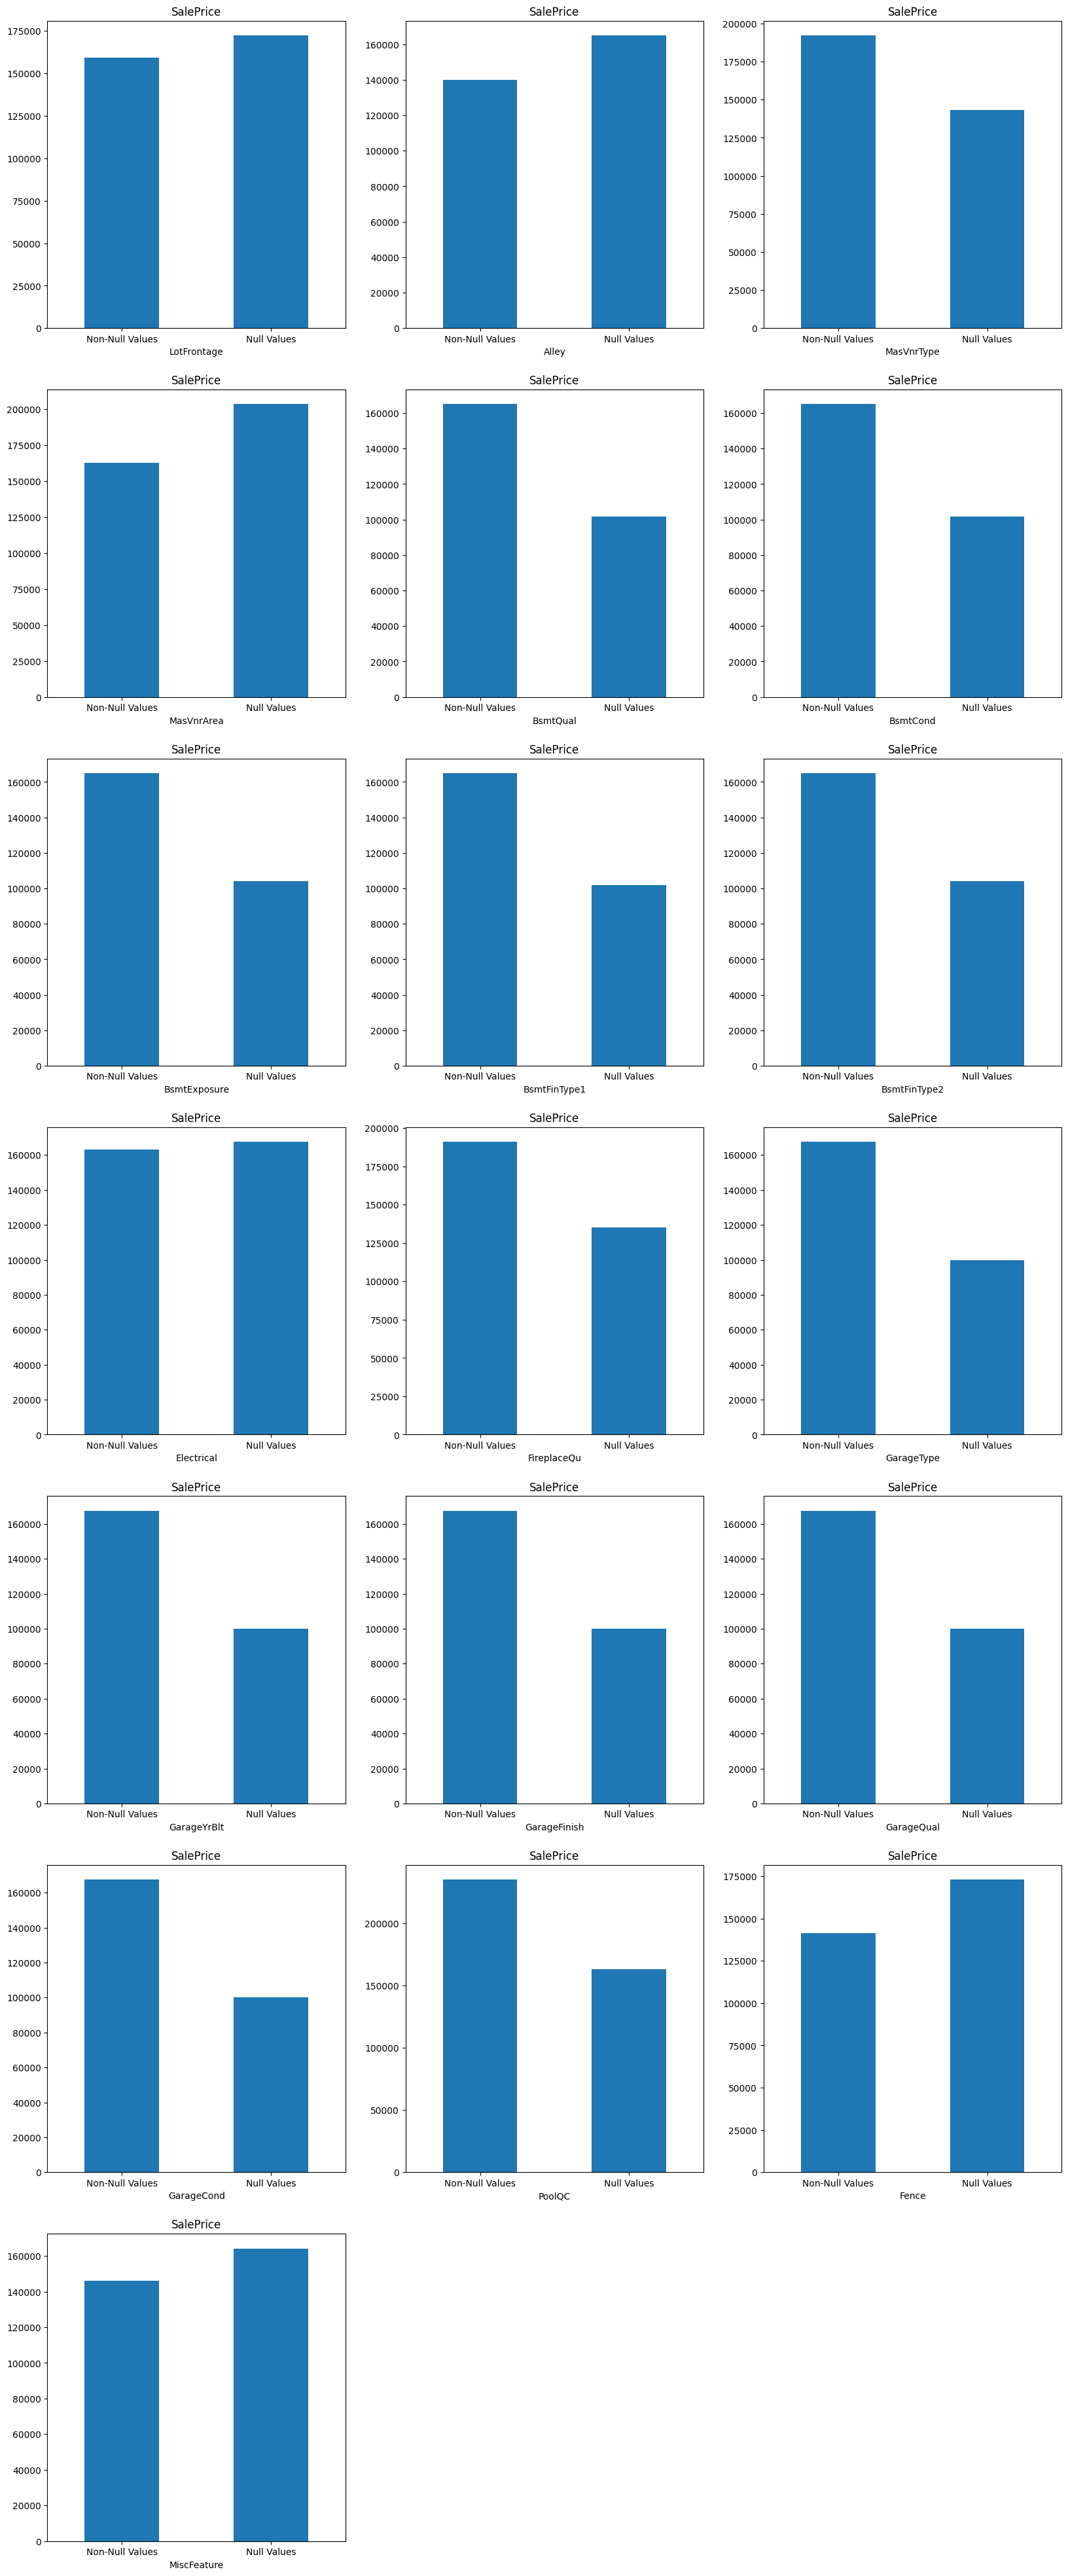

In [15]:
# Initialize an empty list to store column names with missing values
nan_col = []

# Iterate through each column in the DataFrame 'data' to identify columns with missing values
for i in data.columns:
    if data[i].isnull().sum() > 0:
        nan_col.append(i)

# Create a copy of the original DataFrame 'data'
data_copy = data.copy()

# Import necessary library (assuming matplotlib.pyplot is imported as plt)
import matplotlib.pyplot as plt

# Create subplots for visualization
fig, axs = plt.subplots(7, 3, figsize=(20, 50), squeeze=True)

# Iterate through columns with missing values and create bar plots
for i, ax in zip(nan_col, axs.flatten()):    
    # Replace missing values with 'Null Values' and non-missing values with 'Non-Null Values'
    data_copy[i] = np.where(data_copy[i].isnull(), 'Null Values', 'Non-Null Values') 
    # Group by the modified column and plot the median of 'SalePrice' for each category
    data_copy.groupby(i)['SalePrice'].median().plot.bar(rot=0, ax=ax, subplots=True)

# Hide the last two subplots in the last row if there are fewer columns with missing values
axs[6, 1].set_axis_off()
axs[6, 2].set_axis_off()

# Display the plots
plt.show()

In [16]:
# Initialize empty lists to store numerical and categorical column names
num_col = []  # List to store numerical column names
cat_col = []  # List to store categorical column names

# Iterate through each column in the DataFrame
for i in data.columns:
    # Check the data type of the column
    if data[i].dtypes != 'O':  # If the data type is not 'O' (object), it's numerical
        num_col.append(i)     # Append the column name to the numerical column list
    else:
        cat_col.append(i)     # If the data type is 'O', it's categorical, so append the column name to the categorical column list

# Print the counts of numerical and categorical features
print('There are', len(num_col) ,'numerical features in the dataset')
print('There are', len(cat_col), 'categorical features in the dataset')

There are 38 numerical features in the dataset
There are 43 categorical features in the dataset


Explanation of the code:

It iterates through each column in the DataFrame.
For each column, it checks its data type (dtype). If the data type is not 'O' (object), it assumes it's a numerical feature and appends the column name to the num_col list. Otherwise, it assumes it's a categorical feature and appends the column name to the cat_col list.
Finally, it prints out the counts of numerical and categorical features.

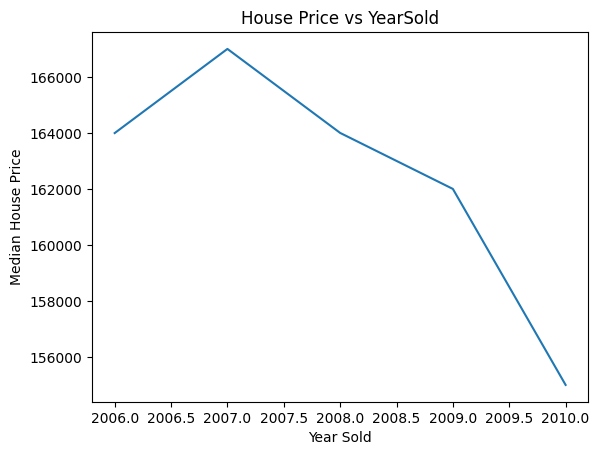

In [17]:
# Assuming df is your DataFrame containing 'YrSold' and 'SalePrice' columns

# Converting 'YrSold' column to integer type
data['YrSold'] = data['YrSold'].astype('int')

# Grouping the DataFrame by 'YrSold' and calculating the median of 'SalePrice' for each year
median_prices_by_year = data.groupby('YrSold')['SalePrice'].median()

# Plotting the median house price against the year sold
median_prices_by_year.plot()

# Adding labels and title to the plot
plt.xlabel('Year Sold')  # Label for x-axis
plt.ylabel('Median House Price')  # Label for y-axis
plt.title("House Price vs YearSold")  # Title of the plot

# Displaying the plot
plt.show()

It is evident that the average procedure declined after 2007, and following the collapse of the housing bubble in 2008, home values fell precipitously. As a result, the year the house was sold has a big impact on the sale price.

In [18]:
# Initialize an empty list to store column names related to years
yr_cols = []

# Iterate over each column in the DataFrame
for i in data.columns:
    # Check if the column name contains any variations of 'Year' or 'yr'
    if 'Yr' in i or 'Year' in i or 'year' in i or 'yr' in i:
        # If the condition is met, append the column name to the list
        yr_cols.append(i)

# Print the list of features containing 'Year' related information
print('List of features with Year are:')
print(yr_cols)

List of features with Year are:
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


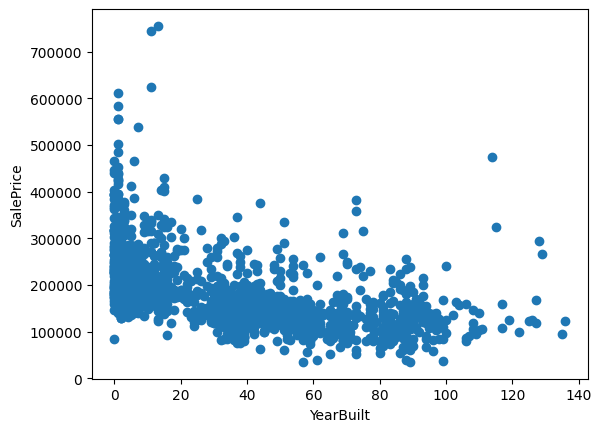

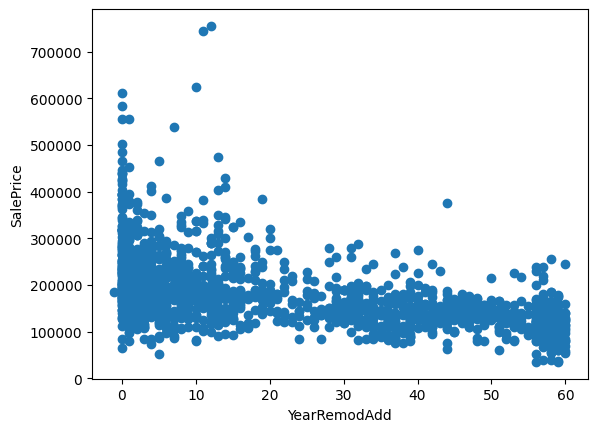

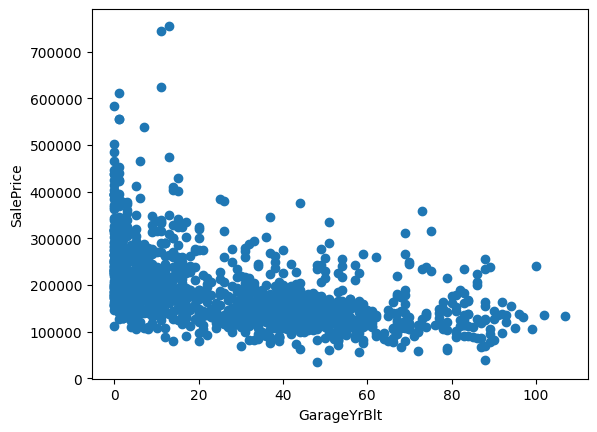

In [20]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Iterate through each feature related to years
for feature in yr_cols:
    # Ensure the feature is not 'YrSold'
    if feature != 'YrSold':
        # Create a copy of the DataFrame to avoid modifying the original data
        data = data.copy()
        
        # Calculate the age of the building/renovation/garage by subtracting the year the event occurred from the year it was sold
        data[feature] = data['YrSold'] - data[feature]
        
        # Plot a scatter plot to compare the age of the building/renovation/garage with the sale price
        plt.scatter(data[feature], data['SalePrice'])
        
        # Set labels for the x-axis and y-axis
        plt.xlabel(feature)  # Feature (e.g., Age of the Building, Renovated Year, Garage Age)
        plt.ylabel('SalePrice')  # Sale Price
        
        # Show the plot
        plt.show()

In [21]:
# Dropping ID Columns from dataset since it is useless in the prediction usecase
data.drop('Id', axis=1, inplace=True)

Explanation:

Dropping ID Columns from dataset since it is useless in the prediction usecase: This is a comment explaining the purpose of the code. It states that the ID column is being dropped from the dataset because it is deemed useless for the prediction use case.
df.drop('Id', axis=1, inplace=True): This line drops the 'Id' column from the DataFrame df. The axis=1 parameter specifies that we are dropping a column (as opposed to a row), and inplace=True means the change is made directly to the DataFrame df without creating a new DataFrame.





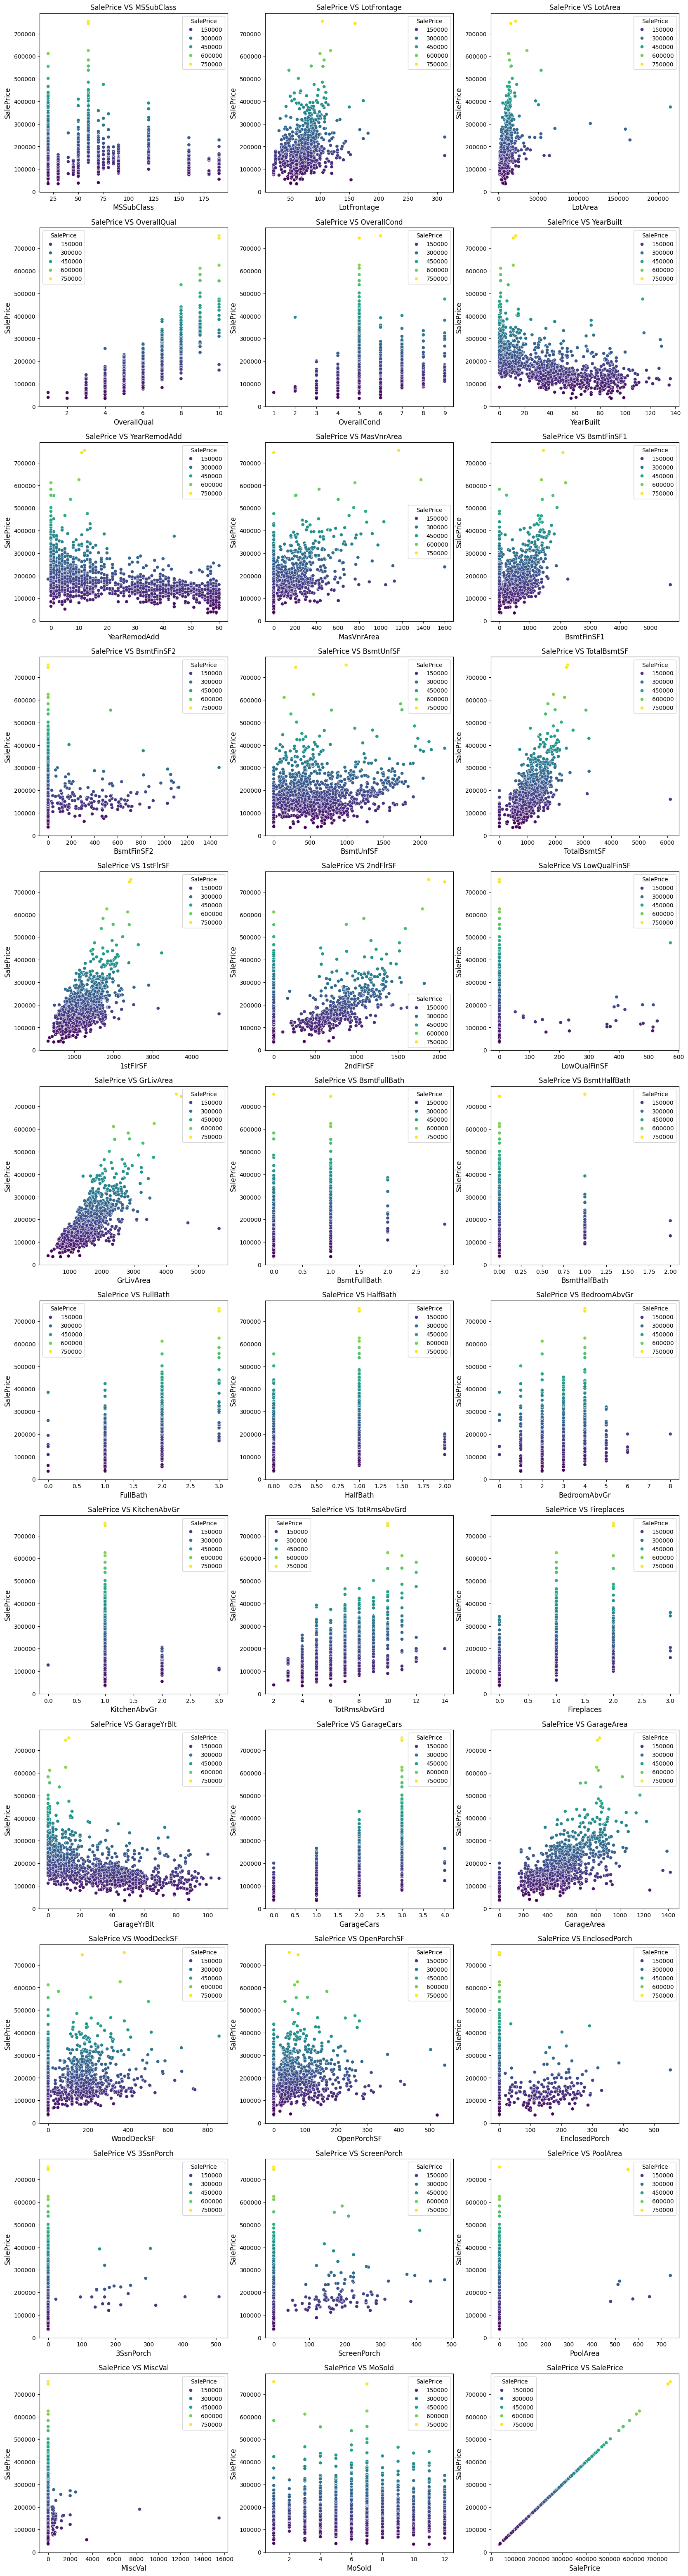

In [23]:
# Assuming df is your DataFrame containing both numerical predictor variables and the target variable 'SalePrice'

# Select only numerical columns from the DataFrame
df_num = data.select_dtypes(include=['int64', 'float64'])

# Create subplots for visualizing each numerical predictor variable against the target variable 'SalePrice'
# Define the number of rows and columns in the subplot grid based on the number of numerical columns
fig, axs = plt.subplots(12, 3, figsize=(20, 80))

# Iterate through each numerical column in the DataFrame
for i, ax in zip(df_num.columns, axs.flatten()):
    # Create a scatter plot of the numerical predictor variable (x-axis) against the target variable 'SalePrice' (y-axis)
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice', data=df_num, ax=ax, palette='viridis')
    
    # Set labels and title for the subplot
    ax.set_xlabel(i, fontsize=12)  # Set label for x-axis
    ax.set_ylabel('SalePrice', fontsize=12)  # Set label for y-axis
    ax.set_title('SalePrice' + ' VS ' + str(i))  # Set title for the subplot (variable name VS SalePrice)

# Show the plot
plt.show()

The graphic above provides the following observations:--Newer properties are more expensive than older ones. 
- The GRLiving Area and the property's procedure are directly related.
- The entire basement area is directly correlated with the property's price, and it is linearly tied to the overall living area.
- The price is unaffected by the month sold.

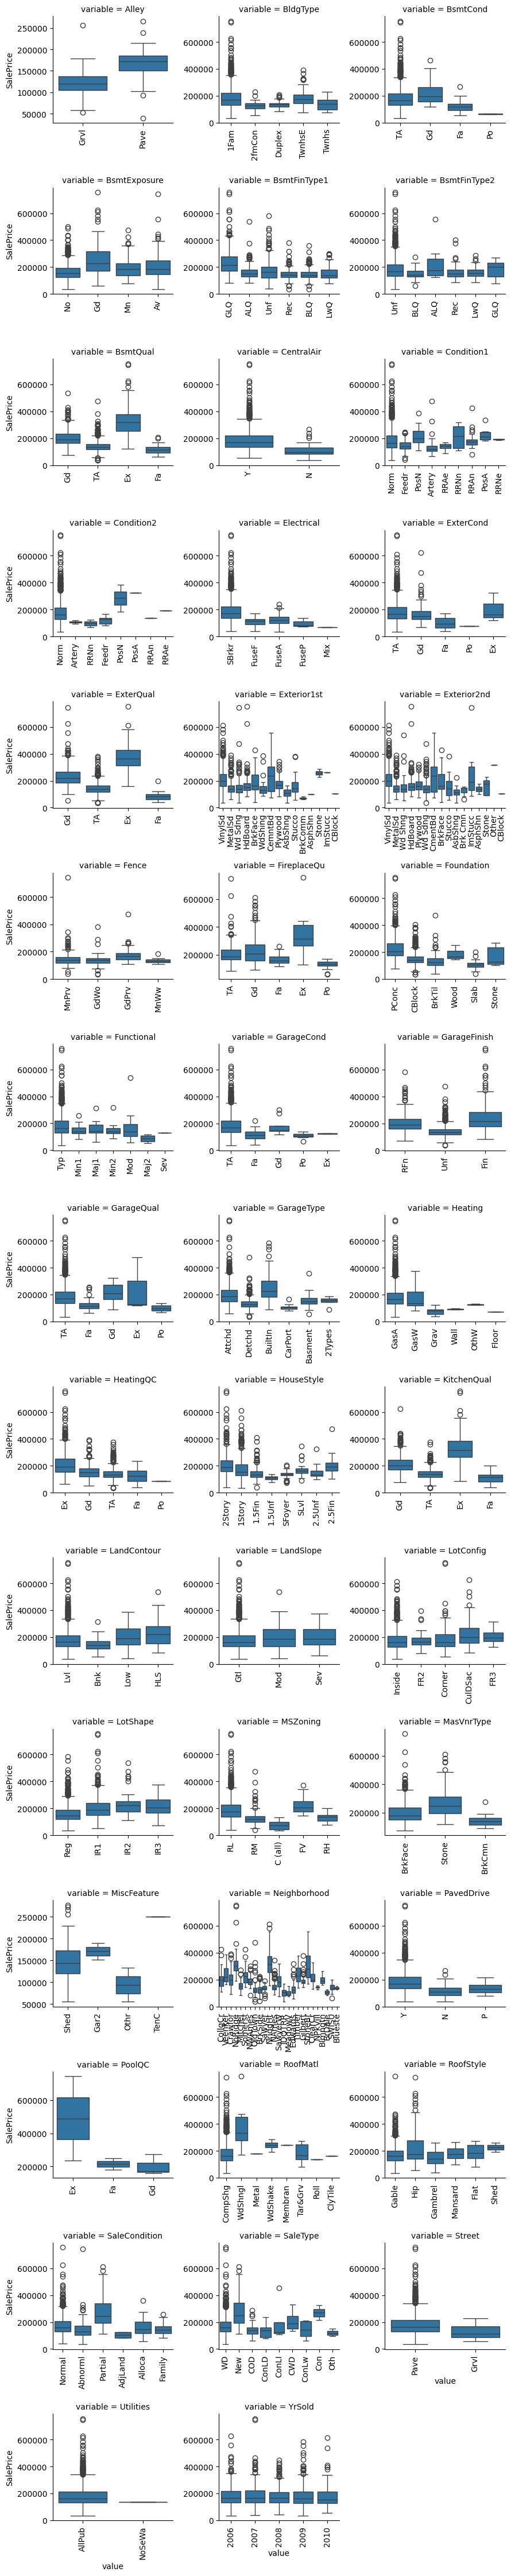

In [27]:
# Define a function to create boxplots for categorical variables against SalePrice
def facetgrid_boxplot(x, y, **kwargs):
    # Create a boxplot with seaborn
    sns.boxplot(x=x, y=y)
    # Rotate x-axis labels for better readability
    x = plt.xticks(rotation=90)

# Select categorical features from the DataFrame (excluding numeric features)
categorical = data.select_dtypes(exclude=['int64','float64'])

# Melt the DataFrame to make it suitable for plotting
# This essentially reshapes the DataFrame so that each row corresponds to a unique combination of SalePrice and a categorical feature
f = pd.melt(data, id_vars=['SalePrice'], value_vars=sorted(data[categorical.columns]))

# Create a FacetGrid with seaborn for plotting
# Col represents the variable to facet along columns
# col_wrap defines the number of columns in the grid
# sharex and sharey are set to False to allow different x and y axes for each subplot
# size specifies the height of each subplot
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False)

# Map the facetgrid_boxplot function to each subplot
# This applies the boxplot function to each combination of categorical variable and SalePrice
g = g.map(facetgrid_boxplot, "value", "SalePrice")

# Show the plot
plt.show()

In the feature engineering section, we deal with a few outliers by capping them at a lower percentile.
The box plots above demonstrate that: - Properties with paved alleyways are more in demand.
- Homes with superior and good basement quality sell for more money than those with inferior quality.
- Homes with excellent garages get greater prices for sale.
- Homes with high-quality kitchens also have a positive price impact.

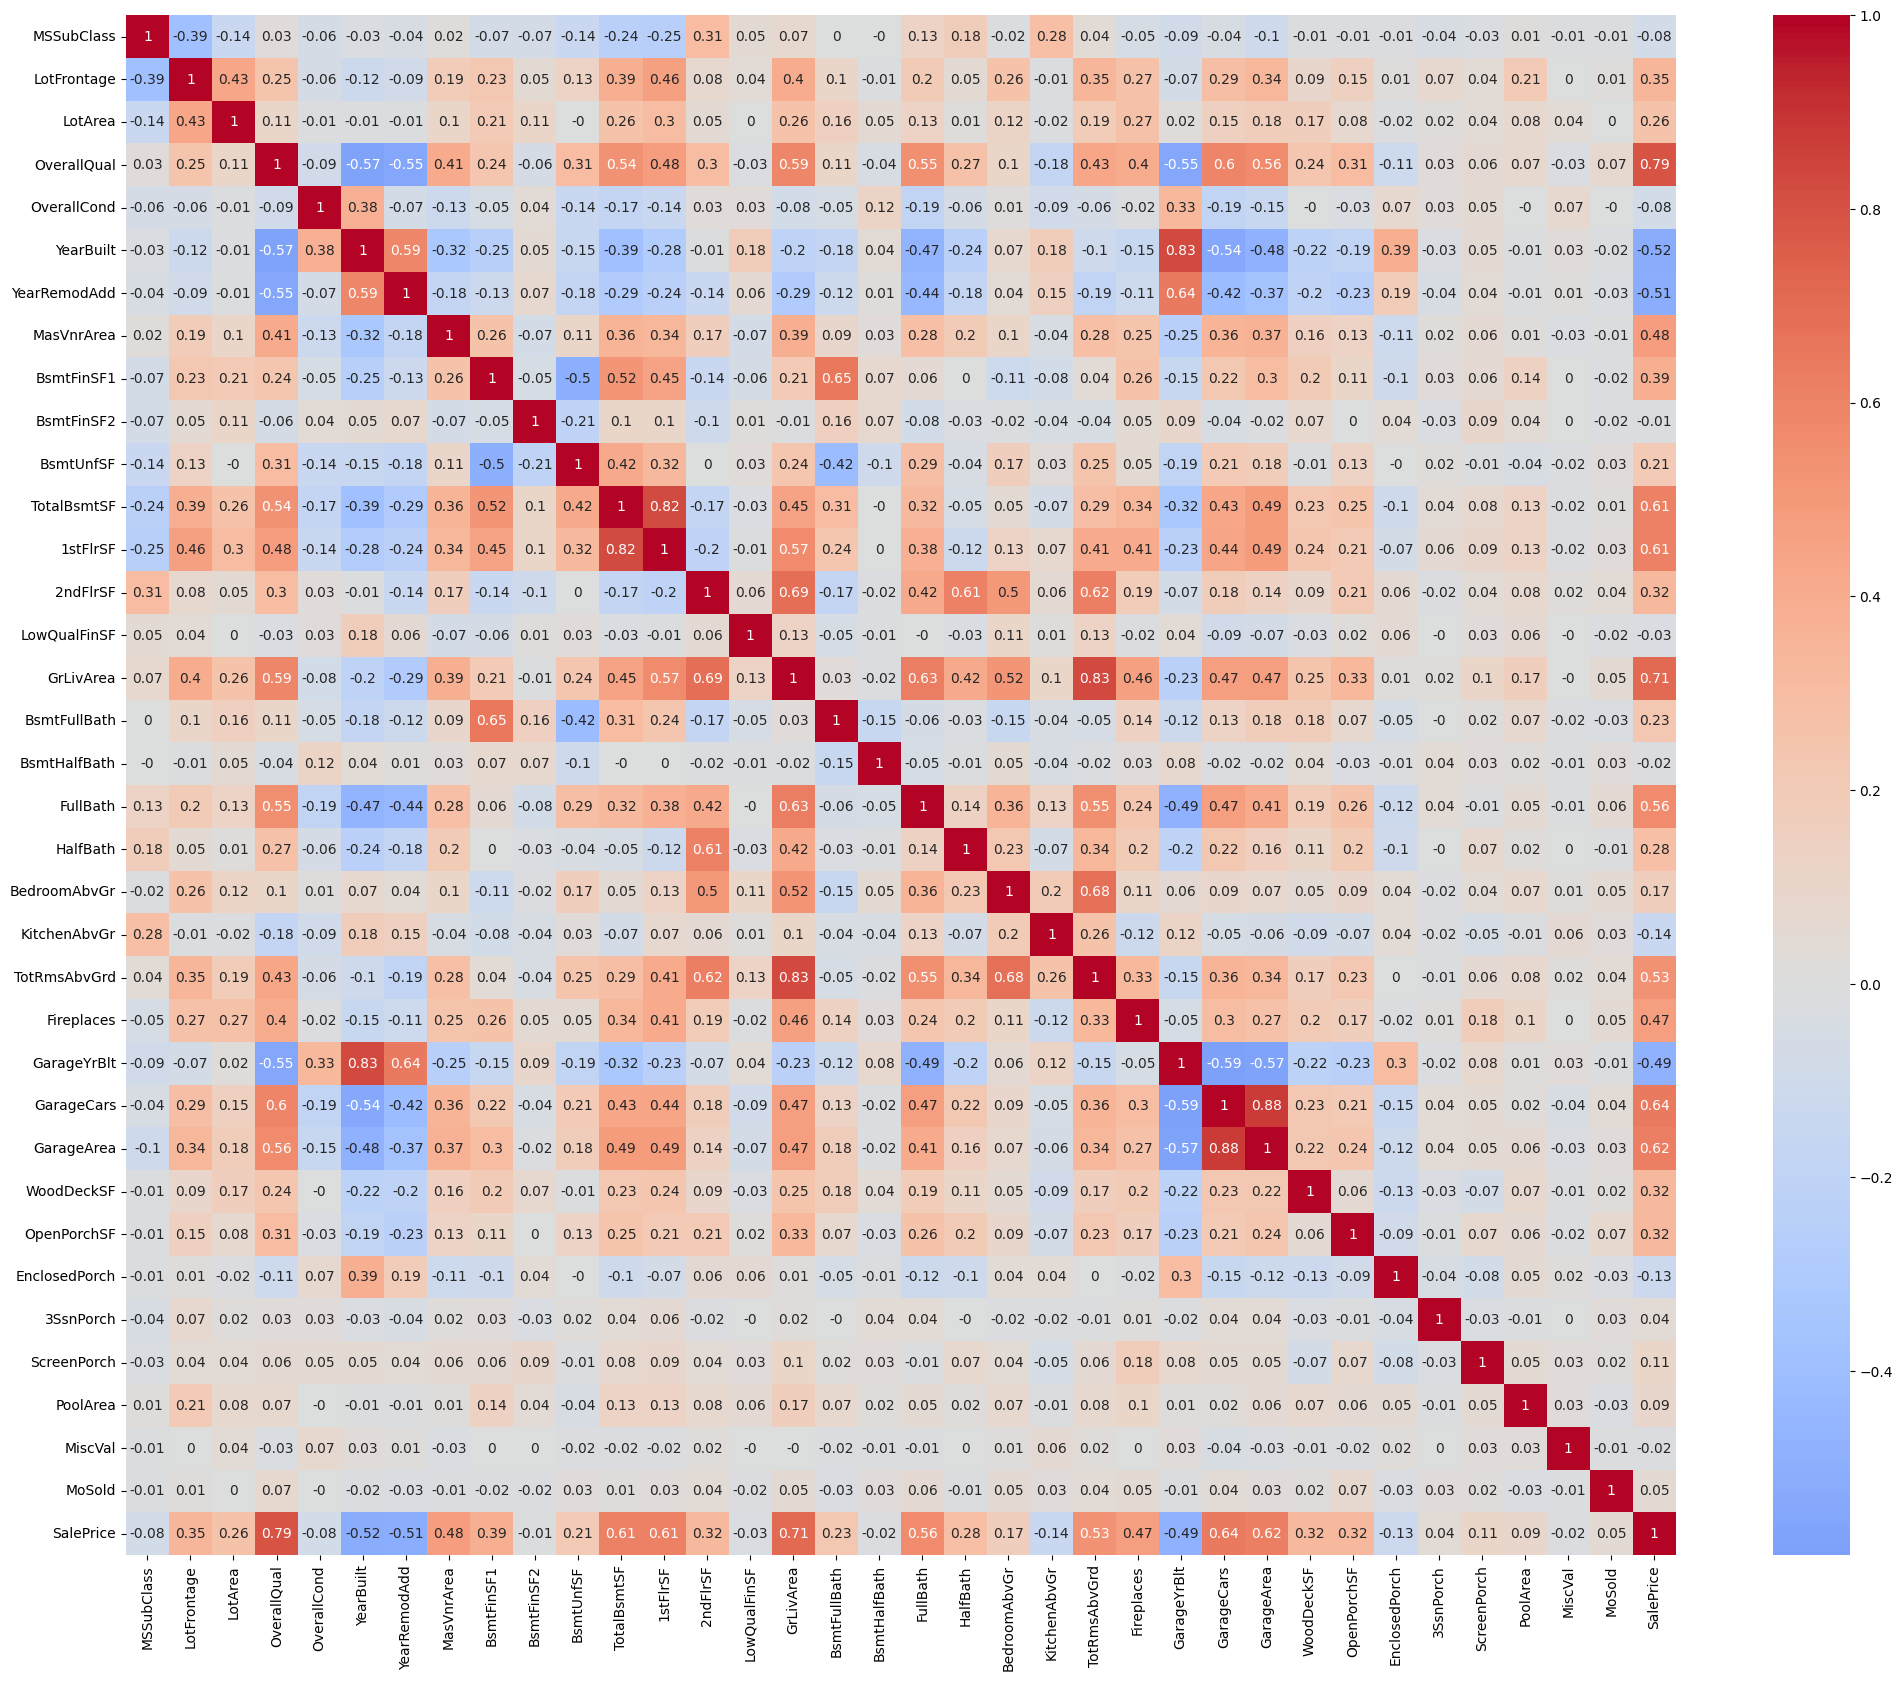

In [28]:
# Set the size of the plot
plt.subplots(figsize=(25, 20))

# Plotting a heatmap of correlation between numerical features
# df_num.corr() calculates the correlation matrix of numerical features in the DataFrame df_num
# round(df_num.corr(), 2) rounds the correlation values to 2 decimal places for better readability
# cmap='coolwarm' sets the color map for the heatmap to 'coolwarm'
# annot=True displays the correlation values on the heatmap
# center=0 centers the color scale at 0
sns.heatmap(round(df_num.corr(), 2), cmap='coolwarm', annot=True, center=0)

# Display the plot
plt.show()

It is evident that certain traits are highly connected. After a few stages, we will eliminate the highly connected qualities.

# Data Gathering

In [29]:
# Creating a new column 'age' to determine the age of the property by subtracting the 'YearBuilt' from the 'YrSold'
data['age'] = data['YrSold'] - data['YearBuilt']

# Creating a new column 'garage_age' to determine the age of the garage by subtracting the 'GarageYrBlt' from the 'YrSold'
data['garage_age'] = data['YrSold'] - data['GarageYrBlt']

# Creating a new column 'remodel_age' to determine the age since the last remodel by subtracting the 'YearRemodAdd' from the 'YrSold'
data['remodel_age'] = data['YrSold'] - data['YearRemodAdd']

# Dropping the 'GarageYrBlt' column as it's no longer needed
data.drop('GarageYrBlt', axis=1, inplace=True)

In [31]:
# Since some of the numerical columns are categorical variables, we must convert them to string columns. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [32]:
# Converting the 'MSSubClass' column to string datatype since it represents categorical features.
# Categorical features are typically treated as strings rather than numerical values.
data[['MSSubClass']] = data[['MSSubClass']].astype(str)

# Converting the 'YrSold' column to string datatype.
# 'YrSold' likely represents the year a property was sold, and treating it as a string makes sense since years are categorical in this context.
data['YrSold'] = data['YrSold'].astype(str)

# Converting the 'MoSold' column to string datatype.
# 'MoSold' likely represents the month a property was sold, and treating it as a string makes sense since months are categorical in this context.
data['MoSold'] = data['MoSold'].astype(str)

# Displaying the first few rows of the DataFrame after the conversions.
# This allows us to verify that the conversion was successful and inspect the changes made.
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave   NaN      Reg         Lvl   
1         20       RL         80.0     9600   Pave   NaN      Reg         Lvl   
2         60       RL         68.0    11250   Pave   NaN      IR1         Lvl   
3         70       RL         60.0     9550   Pave   NaN      IR1         Lvl   
4         60       RL         84.0    14260   Pave   NaN      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5          5             5     Gable   
1     1Story            6            8         31            31     Gable   
2     2Story            7            5          7             6     Gable   
3     2Story            7            5         91            36     Gable   
4     2Story            8            5          8             8     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd        NaN         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng        NaN         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd

### Managing absent values
We impute the NaN values with None, Default, or comparable values rather than removing rows or columns as, intuitively, it is believed that when a certain characteristic is absent from that property, it is left blank during data collection.

In [33]:
# This code prints the percentage of null values for each column in the DataFrame,
# rounding the percentages to two decimal places.
# It then sorts the percentages in descending order (from highest to lowest percentage of null values).
# Finally, it filters out the columns with null values (where the percentage of null values is greater than 0).

# Getting percentage of null values for each column
null_percentage = round(data.isnull().sum() / len(data.index) * 100, 2)

# Sorting the null percentages in descending order
sorted_null_percentage = null_percentage.sort_values(ascending=False)

# Filtering out columns with null values (where percentage > 0)
columns_with_nulls = sorted_null_percentage[round(data.isnull().sum() / len(data.index), 2) > 0]

# Printing the list of columns with null values and their corresponding percentages
print(columns_with_nulls)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageQual       5.55
GarageFinish     5.55
GarageCond       5.55
GarageType       5.55
garage_age       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtCond         2.53
BsmtQual         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
dtype: float64


In [34]:
# From the Data Description
# NA = No Pool for PoolQC
data['PoolQC'] = data['PoolQC'].fillna('None')

# NA = No Misc Feature for MiscFeature
data['MiscFeature'] = data['MiscFeature'].fillna('None')

# NA = No Alley
data['Alley'] = data['Alley'].fillna('None')

# NA = No Fireplace for FireplaceQu
data['FireplaceQu'] = data['FireplaceQu'].fillna('None')

# NA = No Fence
data['Fence'] = data['Fence'].fillna('None')

# NA = No Fireplace
data['FireplaceQu'] = data['FireplaceQu'].fillna('None')

# NA = No Garage
# Filling missing values for Garage related columns
data['GarageCond'] = data['GarageCond'].fillna('None')
data['GarageType'] = data['GarageType'].fillna('None')
data['GarageFinish'] = data['GarageFinish'].fillna('None')
data['GarageQual'] = data['GarageQual'].fillna('None')

# Filling missing values for Garage Age with 0 (assuming no garage means no age)
data['garage_age'] = data['GarageQual'].fillna(0)

# NA = No Basement
# Filling missing values for Basement related columns
data['BsmtExposure'] = data['BsmtExposure'].fillna('None')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('None')
data['BsmtCond'] = data['BsmtCond'].fillna('None')
data['BsmtQual'] = data['BsmtQual'].fillna('None')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('None')

# NA = No Masonry Area
# Filling missing values for Masonry related columns
data['MasVnrType'] = data['MasVnrType'].fillna('None')
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

In [36]:
# Calculate the percentage of missing values in each column
missing_percentage = round(data.isnull().sum() / len(data.index) * 100, 2)

# Sort the missing_percentage Series in descending order
sorted_missing_percentage = missing_percentage.sort_values(ascending=False)

# Filter columns with non-zero missing values (greater than 0%)
non_zero_missing = sorted_missing_percentage[sorted_missing_percentage > 0]

# Print the result
print(non_zero_missing)

LotFrontage    17.74
Electrical      0.07
dtype: float64


In [39]:
# The code fills missing values in the 'LotFrontage' column with the median 'LotFrontage' value
# calculated within each neighborhood group.
# 
# Explanation:
# 
# df.groupby('Neighborhood')['LotFrontage']  --> This groups the DataFrame 'df' by the 'Neighborhood'
#                                               column, creating separate groups for each unique value
#                                               in the 'Neighborhood' column.
# ['LotFrontage']                           --> This selects the 'LotFrontage' column from each group.
# transform(lambda x: x.fillna(x.median())) --> This applies a transformation to each group. The lambda
#                                               function x.fillna(x.median()) is used to fill missing
#                                               values (NaNs) within each group's 'LotFrontage' column
#                                               with the median value of that group's 'LotFrontage'.
#                                               x.median() calculates the median value of the 'LotFrontage'
#                                               within each group, and x.fillna() fills missing values
#                                               in the 'LotFrontage' column of each group with this median value.
#                                               The transform function then returns a Series with the same
#                                               indexes as the original DataFrame, where missing values
#                                               have been filled based on the median 'LotFrontage' of each
#                                               neighborhood group.
# df['LotFrontage'] =                        --> Finally, the original 'LotFrontage' column in the DataFrame
#                                               'df' is updated with the Series returned by the transform
#                                               function, ensuring that missing values in the 'LotFrontage'
#                                               column are filled based on the median 'LotFrontage' value
#                                               within each neighborhood group.

data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [40]:
# Calculate the percentage of missing values for each column in the DataFrame
missing_percentage = round(data.isnull().sum() / len(data.index) * 100, 5)

# Sort the missing_percentage Series in descending order
sorted_missing_percentage = missing_percentage.sort_values(ascending=False)

# Select only columns with missing values (where the percentage of missing values is greater than 0)
columns_with_missing_values = sorted_missing_percentage[round(data.isnull().sum() / len(data.index), 5) > 0]

# Print the columns with missing values and their corresponding percentage
print(columns_with_missing_values)

Electrical    0.06849
dtype: float64


In [41]:
# Assuming data is your DataFrame

# Filling missing values in the 'Electrical' column with the mode (most frequent value) of the column
# If there are multiple modes, the first mode is selected
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

# This line of code fills missing values in the 'Electrical' column with the mode (most frequent value)
# of that column. It uses the fillna() method to replace missing values (NaN) with the mode.
# The mode is obtained by using data['Electrical'].mode(), which returns a pandas Series containing the mode(s)
# of the 'Electrical' column. Since mode() can return multiple modes if they exist, [0] is used to select
# the first mode from the resulting Series.
# Finally, this mode value is assigned to the 'Electrical' column in the DataFrame.

In [42]:
# Calculate the percentage of missing values in each column of the DataFrame
# isnull() function checks for missing values, sum() calculates the total number of missing values for each column
# len(data.index) returns the total number of rows in the DataFrame
# Multiplying by 100 and dividing by the total number of rows gives the percentage of missing values
# round() function rounds the percentages to 5 decimal places
missing_percentage = round(data.isnull().sum() / len(data.index) * 100, 5)

# Sort the missing_percentage Series in descending order based on the percentage of missing values
# sort_values() sorts the Series in ascending order by default, specifying ascending=False sorts it in descending order
sorted_missing_percentage = missing_percentage.sort_values(ascending=False)

# Print or use the sorted missing_percentage Series as needed
print(sorted_missing_percentage)

MSSubClass       0.0
GarageQual       0.0
GarageCars       0.0
GarageFinish     0.0
GarageType       0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
GarageArea       0.0
GarageCond       0.0
MSZoning         0.0
PavedDrive       0.0
garage_age       0.0
age              0.0
SalePrice        0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
MiscFeature      0.0
Fence            0.0
PoolQC           0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
1stFlrSF         0.0
Electrical       0.0
CentralAir       0.0
HeatingQC        0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle   

# Feature Engineering

In [44]:
# Print the count of unique values in the 'Utilities' column of the DataFrame
print(data['Utilities'].value_counts())

# Print the count of unique values in the 'Street' column of the DataFrame
print(data['Street'].value_counts())

# Print the count of unique values in the 'PoolQC' column of the DataFrame
print(data['PoolQC'].value_counts())

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
PoolQC
None    1453
Gd         3
Ex         2
Fa         2
Name: count, dtype: int64


In [45]:
# Function to identify redundant features in a DataFrame
def redundant_feature(df):
    # Initialize an empty list to store redundant feature names
    redundant = []
    
    # Iterate through each column in the DataFrame
    for i in df.columns:
        # Count the occurrences of each unique value in the column
        counts = df[i].value_counts()
        
        # Get the count of the most frequent value in the column
        count_max = counts.iloc[0]
        
        # Calculate the percentage of occurrences of the most frequent value
        # compared to the total number of rows in the DataFrame
        percentage = count_max / len(df) * 100
        
        # If the percentage of the most frequent value exceeds 99%,
        # consider the feature redundant and add it to the list
        if percentage > 99:
            redundant.append(i)
    
    # Convert the redundant feature list to a standard list
    redundant = list(redundant)
    
    # Return the list of redundant features
    return redundant

In [46]:
redundant_features = redundant_feature(data)
redundant_features

['Street', 'Utilities', 'PoolArea', 'PoolQC']

Eliminating these characteristics because they account for more than 99% of a single category and are therefore irrelevant to the forecast

In [48]:
# df.drop(redundant_features, axis=1, inplace=True)

# df: The DataFrame from which we are dropping columns.
# drop(): Method to remove specified labels (rows or columns).
# redundant_features: The list of column names (labels) that we want to drop.
# axis=1: Indicates that we are dropping columns (0 would mean dropping rows).
# inplace=True: Specifies that the operation should be performed on the DataFrame itself without returning a new DataFrame. If False or not specified, it would return a new DataFrame with the specified columns dropped.

data.drop(redundant_features,axis=1,inplace=True)

In [49]:
data.shape

(1460, 78)

In [50]:
# Removing outliers to make the model more robust
# From EDA we see that Living Area, Garage Area, Basement Area, and Lot Area contain outliers. 
# Outliers from these columns are removed, while outliers in other columns will be handled during power transform.
def drop_outliers(x):
    # Initialize an empty list to store the columns containing outliers
    list = []
    # Define the columns with outliers
    outl_col = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']
    # Iterate through each column with outliers
    for col in outl_col:
        # Calculate the first quartile (Q1)
        Q1 = x[col].quantile(.25)
        # Calculate the third quartile (Q3)
        Q3 = x[col].quantile(.99)
        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1
        # Remove outliers from the DataFrame within the specified range (1.5 times the IQR from Q1 and Q3)
        x =  x[(x[col] >= (Q1 - (1.5 * IQR))) & (x[col] <= (Q3 + (1.5 * IQR)))] 
    # Return the DataFrame with outliers removed
    return x  

# Call the drop_outliers function to remove outliers from the DataFrame 'data'
data = drop_outliers(data)
# Print the shape of the DataFrame after removing outliers
print(data.shape)

(1455, 78)


In [52]:
# Creating a new feature by adding the year the house was built and the year it was remodeled.
# This feature represents the combined age of the house and the extent of remodeling done, which is considered significant for predicting house prices.
data['YrBltAndRemod'] = data['YearBuilt'] + data['YearRemodAdd']

# Calculating the total square footage by summing up the square footage of the basement, first floor, and second floor.
# This feature represents the total area of the house, which is an important factor in determining house prices.
data['Total_sqr_footage'] = (data['BsmtFinSF1'] + data['BsmtFinSF2'] + data['1stFlrSF'] + data['2ndFlrSF'])

# Creating a new feature representing the total number of bathrooms in the house.
# This feature accounts for full bathrooms, half bathrooms, basement full bathrooms, and basement half bathrooms.
data['Total_Bathrooms'] = (data['FullBath'] + (0.5 * data['HalfBath']) + data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath']))

# Calculating the total porch area by summing up the areas of various types of porches and decks.
# This feature represents the total outdoor space, which can influence house prices.
data['Total_porch_sf'] = (data['OpenPorchSF'] + data['3SsnPorch'] + data['EnclosedPorch'] + data['ScreenPorch'] + data['WoodDeckSF'])


In [54]:
# Creating lists to store numerical and categorical column names
num_col = []  # List to store numerical column names
cat_col = []  # List to store categorical column names

# Loop through each column in the DataFrame
for i in data.columns:
    # Check if the column data type is not an object (i.e., not a string)
    if data[i].dtypes != 'O':  # 'O' represents object type (strings)
        num_col.append(i)  # If numerical, add the column name to num_col list
    else:
        cat_col.append(i)  # If categorical, add the column name to cat_col list

# Creating dummy variables for categorical columns
# Using pd.get_dummies() to convert categorical variables into dummy/indicator variables
# This creates a new DataFrame containing dummy variables for each categorical column
df_dummy = pd.get_dummies(data[cat_col])

# Concatenating the original DataFrame with the DataFrame containing dummy variables
# along the columns axis (axis=1) to combine them horizontally
data = pd.concat([data, df_dummy], axis=1)

# Dropping the original categorical columns from the DataFrame
# since we have already created dummy variables for them
data = data.drop(cat_col, axis=1)

# End of code
   

In [55]:
data.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5          5             5   
1         80.0     9600            6            8         31            31   
2         68.0    11250            7            5          7             6   
3         60.0     9550            7            5         91            36   
4         84.0    14260            8            5          8             8   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1             3             1             8           0           2   
1         0             3             1             6           1           2   
2         1             3             1             6           1           2   
3         0             3             1             7           1           3   
4         1             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   MiscVal  SalePrice   age  remodel_age  YrBltAndRemod  Total_sqr_footage  \
0        0     208500  2003         2003             10               2416   
1        0     181500  1976         1976             62               2240   
2        0     223500  2001         2002             13               2272   
3        0     140000  1915         1970            127               1933   
4        0     250000  2000         2000             16               2853   

   Total_Bathrooms  Total_porch_sf  MSSubClass_120  MSSubClass_160  \
0              3.5              61           False           False   
1              2.5             298           False           False   
2              3.5              42           False           False   
3              2.0             307           False           False   
4              3.5             276           False           False   

   MSSubClass_180  MSSubClass_190  MSSubClass_20  MSSubClass_30  \
0           False           False          False          False   
1           False           False           True          False   
2           False           False          False          False   
3           False           False          False          False   
4           False           False          False          False   

   MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
0          False          False          False           True          False   
1          False          False          False          False          False   
2          False          False          False           True          False   
3          False          F

In [56]:
# X contains the features (independent variables) by dropping the 'SalePrice' column
X = data.drop('SalePrice', axis=1)

# y contains the target variable 'SalePrice'
y = data['SalePrice']

In [58]:
# Checking co-related features

# Compute the correlation matrix
corr = X.corr()

# Select correlations with absolute values greater than or equal to 0.6
corr1 = corr[abs(corr) >= 0.6]

# Create a copy of the correlation matrix to remove repetitions and correlations with a value of 1
corr2 = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool_))

# Stack the correlation matrix to create a Series with pairs of features and their correlations
corr_result = corr2.stack()

# Print correlations greater than 0.6
print(corr_result[(abs(corr_result) > 0.6)])


OverallQual           GarageCars               0.602025
                      YrBltAndRemod           -0.629299
                      ExterQual_TA            -0.647338
YearBuilt             age                     -0.999036
                      YrBltAndRemod            0.931678
                      Foundation_PConc        -0.651562
                      BsmtQual_TA              0.632561
YearRemodAdd          remodel_age             -0.997926
                      YrBltAndRemod            0.846094
MasVnrArea            MasVnrType_None         -0.687465
BsmtFinSF1            BsmtFullBath             0.655652
                      Total_sqr_footage        0.693726
                      BsmtFinType1_Unf        -0.653551
BsmtFinSF2            BsmtFinType2_Unf        -0.715721
BsmtUnfSF             BsmtFinType1_Unf         0.602664
TotalBsmtSF           1stFlrSF                 0.806004
1stFlrSF              Total_sqr_footage        0.640512
2ndFlrSF              GrLivArea                0

In [59]:
# Drop the specified columns from DataFrame X
X.drop(['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
        '1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars',
        'WoodDeckSF','YrBltAndRemod','Total_Bathrooms','MSSubClass_120','MSSubClass_160','MSSubClass_190','MSSubClass_20',
        'MSSubClass_45','MSSubClass_50','MSSubClass_60','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90',
        'MSZoning_FV','MSZoning_RL','Alley_Grvl','Alley_None','LotShape_IR1','LandContour_Bnk','LotConfig_Corner',
        'LandSlope_Gtl','Neighborhood_NPkVill','Condition1_Feedr','Condition2_Feedr','Condition2_RRAe','BldgType_1Fam',
        'HouseStyle_1Story','RoofStyle_Flat','RoofStyle_Gable','RoofMatl_CompShg','Exterior2nd_AsbShng','Exterior2nd_BrkFace',
        'Exterior2nd_CBlock','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_MetalSd','Exterior2nd_Plywood',
        'Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','MasVnrType_None','ExterQual_Gd','ExterQual_TA',
        'ExterCond_Gd','Foundation_CBlock','Foundation_Slab','BsmtQual_Gd','BsmtQual_None','BsmtCond_Gd','BsmtCond_None',
        'BsmtCond_Po','BsmtExposure_None','BsmtFinType1_None','Heating_GasA','HeatingQC_Ex','CentralAir_N','Electrical_FuseA',
        'KitchenQual_Gd','GarageType_Attchd','GarageType_None','GarageFinish_None','GarageQual_Ex','GarageQual_Fa',
        'GarageQual_Gd','GarageQual_None','GarageQual_Po','GarageQual_TA','GarageCond_Ex','GarageCond_None','GarageCond_Po',
        'GarageCond_TA','PavedDrive_N','Fence_None','MiscFeature_None','SaleType_New','SaleType_WD','SaleCondition_Normal',
        'Foundation_PConc','MiscFeature_Gar2','Foundation_PConc','garage_age_None'],
         axis=1,inplace=True)

In [60]:
# Chekcing the shape after dropping all co-related columns
X.shape

(1455, 234)

In [61]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

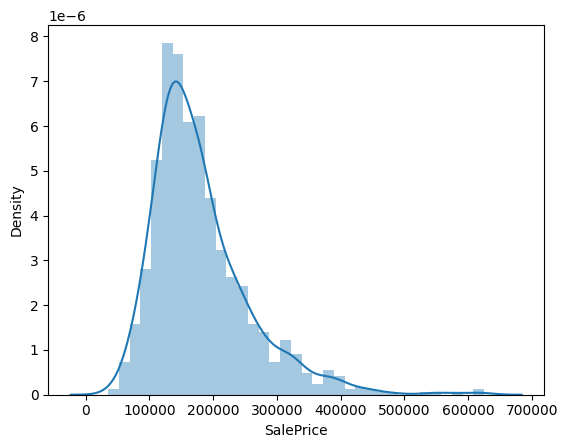

In [62]:
# Use Seaborn's distplot function to plot the distribution of the target variable
sns.distplot(y_train)

# Show the plot
plt.show()

In [63]:
# Creating an instance of PowerTransformer with Box-Cox transformation method
# The 'box-cox' method is chosen for transforming the target feature.
# The 'standardize' parameter is set to False, meaning it will only apply the transformation without standardizing the data.
pt = PowerTransformer(method='box-cox', standardize=False)

# Transforming the target feature (y_train) to make the data more Gaussian
# It's necessary to convert y_train to a DataFrame because PowerTransformer expects a 2D array-like input
y_train = pt.fit_transform(y_train.to_frame())

# Similarly, transforming the target feature of the test set (y_test)
# Note: We only call transform on the test set, not fit_transform, to apply the same transformation learned from the training set
y_test = pt.transform(y_test.to_frame())

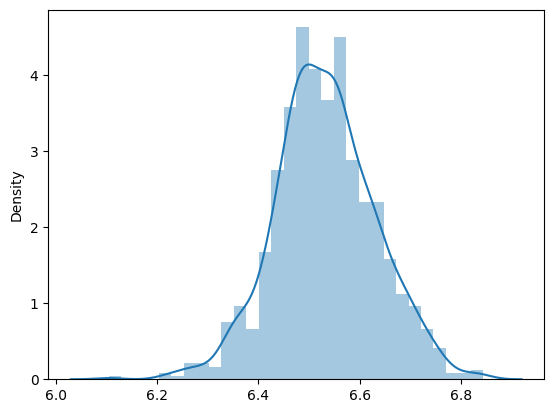

In [64]:
sns.distplot(y_train)
plt.show()

In [65]:

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Scaling the training data (X_train)
X_train_scaled = scaler.fit_transform(X_train)  # Fit scaler and transform X_train
X_train_scaled = DataFrame(X_train_scaled)      # Convert scaled data to DataFrame
X_train_scaled.columns = X.columns              # Assign original column names to the scaled data

# Scaling the test data (X_test)
X_test_scaled = scaler.transform(X_test)        # Transform X_test using the fitted scaler
X_test_scaled = DataFrame(X_test_scaled)        # Convert scaled data to DataFrame
X_test_scaled.columns = X.columns              # Assign original column names to the scaled data

In [66]:
X_train.head()

LotFrontage  LotArea  OverallCond  LowQualFinSF  BsmtFullBath  \
1060         41.0     4920            5             0             1   
1316         61.0    10226            5             0             1   
147          65.0     9505            5             0             0   
1162        109.0     8724            5             0             0   
683          90.0    11248            5             0             1   

      BsmtHalfBath  TotRmsAbvGrd  GarageArea  OpenPorchSF  EnclosedPorch  \
1060             0             6         582            0            170   
1316             0             8         860           42              0   
147              0             8         434           48              0   
1162             0             5         450            0              0   
683              0             7         702           45              0   

      3SsnPorch  ScreenPorch  MiscVal   age  remodel_age  Total_sqr_footage  \
1060          0            0        0  2001         2001               1954   
1316          0            0        0  2008         2008               1630   
147           0            0        0  2001         2001               2035   
1162          0            0        0  1968         1968               1386   
683           0            0        0  2002         2002               2727   

      Total_porch_sf  MSSubClass_180  MSSubClass_30  MSSubClass_40  \
1060             170           False          False          False   
1316             214           False          False          False   
147              192           False          False          False   
1162               0           False          False          False   
683              302           False          False          False   

      MSSubClass_70  MSZoning_C (all)  MSZoning_RH  MSZoning_RM  Alley_Pave  \
1060          False             False        False        False       False   
1316          False             False        False        False       False   
147           False             False        False        False       False   
1162          False             False        False        False       False   
683           False             False        False        False       False   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
1060         False         False          True            False   
1316         False         False         False            False   
147          False         False         False            False   
1162         False         False          True            False   
683          False         False         False            False   

      LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
1060            False             True              False          False   
1316            False             True              False          False   
147             False             True               True          False   
1162            False             True              False          False   
683             False             True              False          False   

      LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
1060          False              True          False          False   
1316          False              True          False          False   
147           False             False          False          False   
1162          False              True          False          False   
683           False             False          False          False   

      Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
1060                 False                 False                False   
1316                 False                 False                False   
147                  False                 False                False   
1162                 False                 False                False   
683                  False                 False                False   

      Neighborhood_BrkSid

### Ridge Regression

Fitting 11 folds for each of 28 candidates, totalling 308 fits


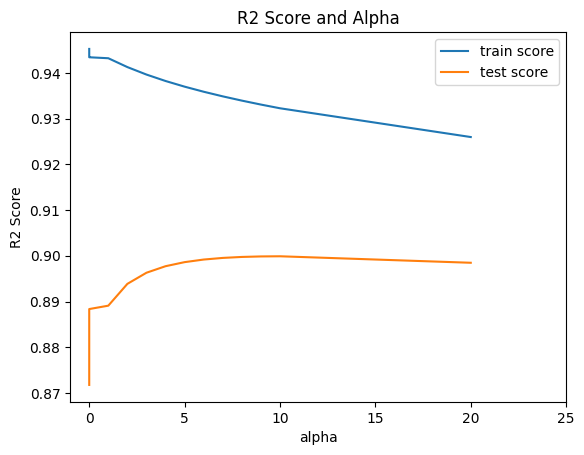

The optimum alpha is 10
The R2 Score of the model on the test dataset for optimum alpha is 0.8469293348324898
The MSE of the model on the test dataset for optimum alpha is 0.0016382863974021202


In [67]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# Using RFE to find top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))


Explanation:

List of Alphas: params is a dictionary containing a list of alpha values to be tested for tuning the Ridge regression model.

RFE Feature Selection: Recursive Feature Elimination (RFE) is used to select the top 300 variables/features based on the Ridge regression estimator (Ridge()).

Cross Validation: GridSearchCV is used for cross-validation to find the optimal alpha from the given list of alphas. It uses Ridge regression as the estimator, params for hyperparameter tuning, 'r2' (coefficient of determination) as the scoring metric, and 11 folds for cross-validation.

Plotting Cross Validation Results: The mean training and test scores for each alpha are plotted against the alpha values to visualize how the model's performance changes with different alphas.

Best Alpha Selection: The alpha corresponding to the highest mean test score is selected as the optimal alpha.

Final Model Fitting: A final Ridge regression model with the optimal alpha is fitted on the training data.

Model Evaluation: The model's performance is evaluated on the test dataset using R-squared (R2) score and Mean Squared Error (MSE). These metrics help assess how well the model generalizes to unseen data.

In [70]:
# Chekcing the VIF (Variance Inflation Factor)

# Create an empty DataFrame to store the VIF values and feature names
vif = pd.DataFrame()

# Assign the column names of the training dataset (features) to the 'Features' column in the DataFrame
vif['Features'] = X_train_rfe.columns

# Calculate the VIF for each feature using a loop
# VIF is calculated using the variance_inflation_factor function from statsmodels.stats.outliers_influence module
# Iterate over each feature's index and calculate its VIF
vif['VIF'] = [variance_inflation_factor(np.array(X_train_rfe.values, dtype=float), i) for i in range(X_train_rfe.shape[1])]

# Round the VIF values to two decimal places for better readability
vif['VIF'] = round(vif['VIF'], 2)

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Filter out features with VIF values greater than 10 (indicating high multicollinearity)
high_vif = vif[vif['VIF'] > 10]

# Display features with high VIF
high_vif

Features     VIF
233         garage_age_TA     inf
170       Functional_Min1     inf
100    Exterior1st_CBlock     inf
99    Exterior1st_BrkFace     inf
98    Exterior1st_BrkComm     inf
97    Exterior1st_AsphShn     inf
96    Exterior1st_AsbShng     inf
150      BsmtFinType2_Unf     inf
168       Functional_Maj1     inf
169       Functional_Maj2     inf
171       Functional_Min2     inf
187      GarageFinish_RFn     inf
172        Functional_Mod     inf
173        Functional_Sev     inf
174        Functional_Typ     inf
175        FireplaceQu_Ex     inf
176        FireplaceQu_Fa     inf
177        FireplaceQu_Gd     inf
178      FireplaceQu_None     inf
179        FireplaceQu_Po     inf
101   Exterior1st_CemntBd     inf
102   Exterior1st_HdBoard     inf
104   Exterior1st_MetalSd     inf
105   Exterior1st_Plywood     inf
138      BsmtFinType1_ALQ     inf
139      BsmtFinType1_BLQ     inf
140      BsmtFinType1_GLQ     inf
141      BsmtFinType1_LwQ     inf
142      BsmtFinType1_Rec     inf
143      BsmtFinType1_Unf     inf
144      BsmtFinType2_ALQ     inf
145      BsmtFinType2_BLQ     inf
146      BsmtFinType2_GLQ     inf
147      BsmtFinType2_LwQ     inf
148     BsmtFinType2_None     inf
149      BsmtFinType2_Rec     inf
110   Exterior1st_WdShing     inf
109   Exterior1st_Wd Sdng     inf
108   Exterior1st_VinylSd     inf
107    Exterior1st_Stucco     inf
106     Exterior1st_Stone     inf
180        FireplaceQu_TA     inf
186      GarageFinish_Fin     inf
214           YrSold_2008     inf
208              MoSold_6     inf
213           YrSold_2007     inf
212           YrSold_2006     inf
188      GarageFinish_Unf     inf
211              MoSold_9     inf
210              MoSold_8     inf
209              MoSold_7     inf
200              MoSold_1     inf
216           YrSold_2010     inf
207              MoSold_5     inf
206              MoSold_4     inf
201             MoSold_10     inf
202             MoSold_11     inf
203             MoSold_12     inf
205              MoSold_3     inf
215           YrSold_2009     inf
204              MoSold_2     inf
229         garage_age_Ex     inf
230         garage_age_Fa     inf
232         garage_age_Po     inf
231         garage_age_Gd     inf
137       BsmtExposure_No  237.50
134       BsmtExposure_Av  136.84
135       BsmtExposure_Gd   86.34
136       BsmtExposure_Mn   77.50
49     Neighborhood_NAmes   57.55
53   Neighborhood_OldTown   41.15
42   Neighborhood_CollgCr   40.04
45   Neighborhood_Gilbert   30.15
44   Neighborhood_Edwards   29.13
57   Neighborhood_Somerst   27.69
52   Neighborhood_NridgHt   24.89
50    Neighborhood_NWAmes   21.26
55    Neighborhood_Sawyer   20.68
40   Neighborhood_BrkSide   20.41
13                    age   18.72
56   Neighborhood_SawyerW   18.32
48   Neighborhood_Mitchel   15.59
43   Neighborhood_Crawfor   14.42
46    Neighborhood_IDOTRR   13.00
51   Neighborhood_NoRidge   12.78

In [71]:
# Drop features with high VIF from the training and test datasets
# X_train_rfe is the training dataset with features selected using recursive feature elimination (RFE)
# X_test_rfe is the test dataset corresponding to the features selected in the training dataset
# high_vif.Features contains the names of features identified to have high Variance Inflation Factor (VIF)
# drop() function is used to remove columns (features) specified by high_vif.Features axis=1 indicates column-wise operation
# X_train_rfe2 is the new training dataset after dropping the features with high VIF
# X_test_rfe2 is the new test dataset after dropping the same features as in X_train_rfe2
X_train_rfe2 = X_train_rfe.drop(high_vif.Features,axis=1)
X_test_rfe2 = X_test_rfe.drop(high_vif.Features,axis=1)

Fitting 11 folds for each of 28 candidates, totalling 308 fits


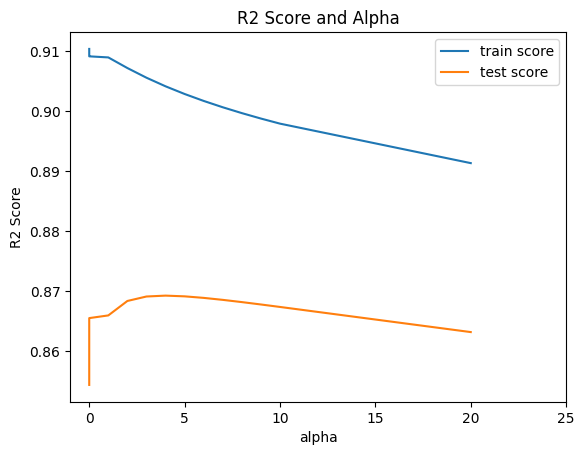

The optimum alpha is 4
For ideal alpha, the model's R2 Score on the test dataset is 0.822557570707734
When comparing the model's MSE for optimum alpha on the test dataset, it is 0.0018991327823223516


In [72]:
# Building the second Ridge Model

# Define a range of alpha values to be tested
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
 
# Initialize Ridge regression model
ridge = Ridge(random_state=100)

# Define number of folds for cross-validation
folds = 11

# Perform grid search cross-validation to find the best alpha value
model_cv = GridSearchCV(estimator=ridge, param_grid=params, scoring='r2', cv=folds, return_train_score=True, verbose=1)
model_cv.fit(X_train_rfe2, y_train)

# Store cross-validation results in a DataFrame
cv_results = pd.DataFrame(model_cv.cv_results_)

# Filter out alpha values greater than 30 for plotting
cv_results = cv_results[cv_results['param_alpha'] <= 30]

# Convert alpha values to integers for plotting
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# Plot mean train and test scores against alpha values
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0, 30, 5))
plt.show()

# Select the optimum alpha value based on the highest mean test score
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is', alpha)

# Build the final Ridge model with the optimum alpha
ridge_final2 = Ridge(alpha=alpha, random_state=100)
ridge_final2.fit(X_train_rfe2, y_train)

# Get the coefficients of the final Ridge model
ridge_coef2 = ridge_final2.coef_

# Make predictions on the test set
y_test_pred = ridge_final2.predict(X_test_rfe2)

# Evaluate the model performance on the test set
print("For ideal alpha, the model's R2 Score on the test dataset is", r2_score(y_test, y_test_pred))
print("When comparing the model's MSE for optimum alpha on the test dataset, it is", mean_squared_error(y_test, y_test_pred))


In [73]:
# Creating a DataFrame to store the coefficients of the ridge regression model
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef2), columns=X_train_rfe2.columns)

# Transposing the DataFrame to have coefficients as rows and feature names as columns
ridge_coeff2 = ridge_coeff2.T

# Renaming the column containing coefficients
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'}, inplace=True)

# Sorting the DataFrame by the absolute values of coefficients in descending order
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False, inplace=True)

# Displaying the top 20 features with the highest absolute coefficients
ridge_coeff2.head(20)

Ridge Co-Efficient
CentralAir_Y                     0.029878
Neighborhood_StoneBr             0.024774
Alley_Pave                       0.021760
MSSubClass_70                    0.019776
PavedDrive_P                     0.016999
LandContour_HLS                  0.016946
Condition1_Norm                  0.016638
Neighborhood_Veenker             0.016433
KitchenQual_Ex                   0.015628
BsmtQual_Ex                      0.015514
MasVnrType_Stone                 0.015092
SaleType_Con                     0.015088
HouseStyle_1.5Unf                0.014682
Condition1_PosN                  0.013992
PavedDrive_Y                     0.013718
SaleType_Oth                     0.013521
RoofMatl_WdShngl                 0.012753
HouseStyle_2.5Unf                0.012678
SaleType_CWD                     0.011919
SaleCondition_Partial            0.011791

The above list includes the Top 20 attributes that affect the property's pricing.

## Lasso
We also test the overall performance of a Lasso Model for demonstrative purposes.

In [74]:
# Creating a Lasso regression model with an arbitrary alpha value (0.0001)
lasso1 = Lasso(alpha=0.0001)

# Fitting the model to the training data
lasso1.fit(X_train_rfe2, y_train)

# Predicting the target variable on the test dataset
y_test_pred = lasso1.predict(X_test_rfe2)

# Calculating and printing the R-squared score of the model on the test dataset
print("For 0.0001 alpha, the model's R2 Score on the test dataset is", r2_score(y_test, y_test_pred))

# Calculating and printing the mean squared error (MSE) of the model on the test dataset
print("When comparing the model's MSE for optimum alpha on the test dataset, it is", mean_squared_error(y_test, y_test_pred))

For 0.0001 alpha, the model's R2 Score on the test dataset is 0.8239660784847195
When comparing the model's MSE for optimum alpha on the test dataset, it is 0.0018840577898073254


Fitting 11 folds for each of 11 candidates, totalling 121 fits


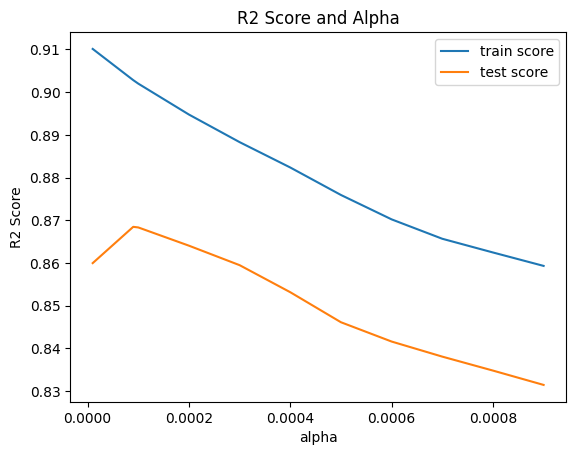

The optimum alpha is 9e-05
For ideal alpha, the model's R2 Score on the test dataset is 0.8240945691876476
When comparing the model's MSE for optimum alpha on the test dataset, it is 0.0018826825780999135


In [75]:

# Define a range of alpha values to search for the optimum
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009]}

# Initialize Lasso regression model
lasso = Lasso(random_state=100)

# Define number of folds for cross-validation
folds = 11

# Initialize GridSearchCV with Lasso model, alpha parameter grid, R2 scoring, and cross-validation folds
model_cv = GridSearchCV(estimator=lasso, param_grid=params, scoring='r2', cv=folds, return_train_score=True, verbose=1)

# Fit the GridSearchCV object to the training data
model_cv.fit(X_train_rfe2, y_train) 

# Convert the cross-validation results to a DataFrame
cv_results = pd.DataFrame(model_cv.cv_results_)

# Plot mean train and test scores against alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

# Find the alpha with the highest mean test score
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is', alpha)

# Initialize Lasso model with the optimum alpha
lasso_final2 = Lasso(alpha=alpha, random_state=100)

# Fit the Lasso model to the training data
lasso_final2.fit(X_train_rfe2, y_train)

# Get the coefficients of the Lasso model
lasso_coef2 = lasso_final2.coef_

# Predict target variable on the test data
y_test_pred = lasso_final2.predict(X_test_rfe2)

# Print R2 score and MSE of the model on the test dataset
print("For ideal alpha, the model's R2 Score on the test dataset is", r2_score(y_test, y_test_pred))
print("When comparing the model's MSE for optimum alpha on the test dataset, it is", mean_squared_error(y_test, y_test_pred))

In [76]:
# Displaying the coefficients of the Lasso regression model

# Create a DataFrame to hold the coefficients, ensuring it has at least 2 dimensions
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2), columns=X_train_rfe2.columns)

# Transpose the DataFrame to have features as rows and coefficients as columns
lasso_coeff2 = lasso_coeff2.T

# Rename the column to "Lasso Co-Efficient"
lasso_coeff2.rename(columns={0: "Lasso Co-Efficient"}, inplace=True)

# Sort the coefficients in descending order
lasso_coeff2.sort_values(by=['Lasso Co-Efficient'], ascending=False, inplace=True)

# Display the top 20 coefficients
lasso_coeff2.head(20)

Lasso Co-Efficient
CentralAir_Y                     0.032557
Neighborhood_StoneBr             0.025251
Alley_Pave                       0.021622
MSSubClass_70                    0.017581
Condition1_Norm                  0.017280
LandContour_HLS                  0.016686
BsmtQual_Ex                      0.016053
Neighborhood_Veenker             0.015890
KitchenQual_Ex                   0.015813
MasVnrType_Stone                 0.014390
PavedDrive_P                     0.014058
Condition1_PosN                  0.013030
PavedDrive_Y                     0.012495
SaleCondition_Partial            0.011187
BsmtCond_TA                      0.010814
HouseStyle_2.5Unf                0.010779
LotConfig_CulDSac                0.009210
HouseStyle_1.5Unf                0.009027
OverallCond                      0.007399
TotRmsAbvGrd                     0.007013

The final Lasso model's top 20 properties are listed above.

### The following is the final Ridge Regression Model.

In [78]:
ridge_final2

Ridge(alpha=4, random_state=100)

### The Final Lasso Regression Model is as follows

In [79]:
lasso_final2

Lasso(alpha=9e-05, random_state=100)

We obtain an approximate R2 score of 0.82 for both the Ridge and Lasso models. The two models demonstrate that the following factors have the greatest impact on property prices:

- Total square footage
- The entire garage space
- Total Number of Rooms
- Condition of the Lot: Central air conditioning
- Total Area of the Porch, Enclosed and Open
- Kitchen Standard Basement Standard

### Subjective Questions: Validation/Demonstration

1. What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [80]:
# Building Ridge Model by doubling the value of alpha to 4
# Instantiate Ridge regression model with alpha value doubled and set random state for reproducibility
ridge_double = Ridge(alpha=4, random_state=100)

# Fit the Ridge model on the training data
ridge_double.fit(X_train_rfe2, y_train)

# Extract the coefficients of the Ridge model
ridge_double_coef = ridge_double.coef_

# Predict target variable on the test data
y_test_pred = ridge_double.predict(X_test_rfe2)

# Print R2 score of the model on the test dataset for doubled alpha
print('The R2 Score of the model on the test dataset for doubled alpha is', r2_score(y_test, y_test_pred))

# Print Mean Squared Error (MSE) of the model on the test dataset for doubled alpha
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))

# Convert the coefficients into a DataFrame and transpose it for better readability
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef), columns=X_train_rfe2.columns)
ridge_double_coeff = ridge_double_coeff.T

# Rename the column to reflect Ridge Doubled Alpha Coefficient
ridge_double_coeff.rename(columns={0: 'Ridge Doubled Alpha Co-Efficient'}, inplace=True)

# Sort the coefficients in descending order to identify the most important predictors
ridge_double_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False, inplace=True)

# Print the top 20 most important predictor variables
print('The most important predictor variables are as follows:')
ridge_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.822557570707734
The MSE of the model on the test dataset for doubled alpha is 0.0018991327823223516
The most important predictor variables are as follows:


Ridge Doubled Alpha Co-Efficient
CentralAir_Y                                   0.029878
Neighborhood_StoneBr                           0.024774
Alley_Pave                                     0.021760
MSSubClass_70                                  0.019776
PavedDrive_P                                   0.016999
LandContour_HLS                                0.016946
Condition1_Norm                                0.016638
Neighborhood_Veenker                           0.016433
KitchenQual_Ex                                 0.015628
BsmtQual_Ex                                    0.015514
MasVnrType_Stone                               0.015092
SaleType_Con                                   0.015088
HouseStyle_1.5Unf                              0.014682
Condition1_PosN                                0.013992
PavedDrive_Y                                   0.013718
SaleType_Oth                                   0.013521
RoofMatl_WdShngl                               0.012753
HouseStyle_2.5Unf                              0.012678
SaleType_CWD                                   0.011919
SaleCondition_Partial                          0.011791

In [81]:
# Initializing the Lasso model with the doubled value of alpha
lasso_double = Lasso(alpha=0.0002, random_state=100)

# Fitting the Lasso model on the training data
lasso_double.fit(X_train_rfe2, y_train)

# Retrieving the coefficients of the fitted Lasso model
lasso_double_coef = lasso_double.coef_

# Making predictions on the test dataset
y_test_pred = lasso_double.predict(X_test_rfe2)

# Calculating the R2 score of the model on the test dataset
print('The R2 Score of the model on the test dataset for doubled alpha is', r2_score(y_test, y_test_pred))

# Calculating the Mean Squared Error (MSE) of the model on the test dataset
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))

# Creating a DataFrame to store the coefficients of the predictors
lasso_double_coeff = pd.DataFrame(np.atleast_2d(lasso_double_coef), columns=X_train_rfe2.columns)
lasso_double_coeff = lasso_double_coeff.T

# Renaming the column to represent the Lasso doubled alpha coefficient
lasso_double_coeff.rename(columns={0: 'Lasso Doubled Alpha Co-Efficient'}, inplace=True)

# Sorting the coefficients in descending order
lasso_double_coeff.sort_values(by=['Lasso Doubled Alpha Co-Efficient'], ascending=False, inplace=True)

# Printing the top 20 important predictor variables
print('The most important predictor variables are as follows:')
lasso_double_coeff.head(20)

The R2 Score of the model on the test dataset for doubled alpha is 0.8218671401951242
The MSE of the model on the test dataset for doubled alpha is 0.0019065223296005473
The most important predictor variables are as follows:


Lasso Doubled Alpha Co-Efficient
CentralAir_Y                                   0.031768
Neighborhood_StoneBr                           0.018404
BsmtQual_Ex                                    0.017478
Alley_Pave                                     0.016133
KitchenQual_Ex                                 0.014219
Condition1_Norm                                0.013853
LandContour_HLS                                0.013637
MasVnrType_Stone                               0.012956
MSSubClass_70                                  0.011707
SaleCondition_Partial                          0.011525
BsmtCond_TA                                    0.010600
LotConfig_CulDSac                              0.008313
PavedDrive_Y                                   0.008285
OverallCond                                    0.007504
TotRmsAbvGrd                                   0.007125
BldgType_TwnhsE                                0.006576
PavedDrive_P                                   0.006488
MasVnrType_BrkFace                             0.006029
ExterCond_TA                                   0.004550
RoofStyle_Hip                                  0.002331

Since the alpha value was so low, doubling it has no discernible effect on any of the models; instead, the R2 and MSE stay essentially unchanged. The Central Air Conditioned -> Yes characteristic gets greater value than Lot Area in the Lasso Model, while the most significant predictor factors stay the same.

3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [82]:
# Removing the 5 most important predictor variables from the incoming dataset
# Dropping specified columns from X_test_rfe2 and X_train_rfe2 to create X_test_rfe3 and X_train_rfe3
X_test_rfe3 = X_test_rfe2.drop(['Total_sqr_footage', 'GarageArea', 'TotRmsAbvGrd', 'OverallCond', 'LotArea'], axis=1)
X_train_rfe3 = X_train_rfe2.drop(['Total_sqr_footage', 'GarageArea', 'TotRmsAbvGrd', 'OverallCond', 'LotArea'], axis=1)

# Building Lasso Model with the new dataset
# Initializing and fitting Lasso regression with specified alpha and random state
lasso3 = Lasso(alpha=0.0001, random_state=100)
lasso3.fit(X_train_rfe3, y_train)

# Obtaining predictions on test data
y_test_pred = lasso3.predict(X_test_rfe3)

# Calculating and printing R2 Score and MSE of the model on the test dataset
print("The model's R2 Score on the test dataset is.", r2_score(y_test, y_test_pred))
print("The model's mean square error on the test dataset is", mean_squared_error(y_test, y_test_pred))

# Creating DataFrame to display Lasso coefficients
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3.coef_), columns=X_train_rfe3.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient'}, inplace=True)

# Sorting coefficients in descending order and displaying the top 5
lasso3_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False, inplace=True)
print('The following are the key predictive variables:')
lasso3_coeff.head(5)

The model's R2 Score on the test dataset is. 0.7322968810673207
The model's mean square error on the test dataset is 0.0028651758833711477
The following are the key predictive variables:


Lasso Co-Efficient
HouseStyle_2.5Unf               0.062613
HouseStyle_2.5Fin               0.049470
Neighborhood_StoneBr            0.043728
Neighborhood_Veenker            0.041480
CentralAir_Y                    0.041457

4. How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

Because simpler models are typically more "generic" and more broadly applicable, we should choose the one that performs better on the test data when two models exhibit similar "performance" in the finite training or test data, according to Occam's Razor.
- Less complex models are easier to train since they require fewer training samples to be effectively trained.
- More resilient models are simpler ones.
 -  When the training data set changes, complex models frequently undergo drastic modifications.
 -  Complex models have low bias and high variance, while simple models have low variance and high bias.
 -  In the training set, simpler models commit more mistakes. Overfitting is a result of complex models that perform incredibly well on training examples but horribly on other test samples.
 
Thus, simplify the model without making it unusable in order to increase its robustness and generalizability.
The model can be simplified by the use of regularization. Regularization aids in finding the right balance between maintaining the model's simplicity and preventing it from being too basic to be of any use. Regularization for regression entails multiplying the cost by a regularization term equal to the sum of the squares or absolute values of the model's parameters.
Additionally, there is a bias-variance trade-off when a model is simplified:
- Because a complicated model must adapt to each small change in the dataset, it is incredibly unstable and sensitive to changes in the training set.
- Even with additional or fewer data points added or removed, a more basic model that abstracts away any pattern identified by the provided data points is not likely to alter significantly.

Bias measures the model's propensity to be accurate when applied to test data. If there is sufficient training data, a complicated model can accurately forecast a job. Overly naive models, such as those that provide the same response for every test input and do not discriminate at all, have a significant bias since their predicted error is substantial for every test input.
The term "variance" describes how much the model has changed in response to variations in the training set.
As the graph below illustrates, maintaining the balance between variance and bias will help to minimize overall error, maintaining the model's accuracy.el's accuracy.el's accuracy..t.ed:ias.